In [1]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from matplotlib.backends.backend_pdf import PdfPages

In [3]:
files = glob.glob('/home/weiran/ltcl/ablations/toy_nonlinear_ts_trans_*.csv')

In [4]:
print(files)

['/home/weiran/ltcl/ablations/toy_nonlinear_ts_trans_v2.csv']


In [5]:
results = [ ]
for f in files:
    results.append(pd.read_csv(f)['Value'].max())
print(np.mean(results), np.std(results))

0.9838135838508606 0.0


In [6]:
files = glob.glob('/home/weiran/ltcl/baselines/toy_linear_ts_fvae_v*')
print(files)

['/home/weiran/ltcl/baselines/toy_linear_ts_fvae_v0.csv', '/home/weiran/ltcl/baselines/toy_linear_ts_fvae_v1.csv']


In [7]:
from scipy import interpolate

In [354]:
PATHS = ['/home/weiran/ltcl/baselines/toy_linear_ts_v*',
         '/home/weiran/ltcl/baselines/toy_linear_ts_beta_v*',
         '/home/weiran/ltcl/baselines/toy_linear_ts_fvae_v*',
         '/home/weiran/ltcl/baselines/toy_linear_ts_pcl_v*',
         '/home/weiran/ltcl/baselines/toy_linear_ts_svae_v*']
colors =  ['black', 'red', 'green', 'navy', 'blue']
labels = ['LEAP', 'BetaVAE', 'FactorVAE', 'PCL', 'SlowVAE']

In [355]:
figure_path = '/home/weiran/figs/'

/tmp/ipykernel_5213/858593949.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(xlabels)


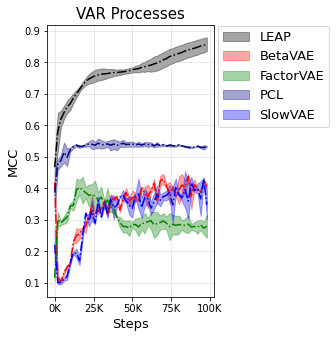

In [358]:
with PdfPages(figure_path + '/var_traj.pdf') as pdf:
    interval = 2000
    steps = 100_000
    x_interp = np.arange(0, steps, interval)
    fig, axes = plt.subplots(1,1, figsize=(3,5))
    for i, path in enumerate(PATHS):
        files = glob.glob(path)
        results = [ ]
        for f in files:
            df = pd.read_csv(f)
            x = df['Step'].values
            y = df['Value'].values
            xnew = np.arange(0,x[-1], interval)
            f = interpolate.interp1d(x, y, fill_value='extrapolate')  
            ynew = f(xnew)
            if len(ynew) < len(x_interp):
                y_clip = list(ynew) + [ynew[-1]] * (len(x_interp)-len(ynew))
            else:
                y_clip = ynew[:len(x_interp)]
            results.append(y_clip)
        results = np.stack(results)
        results = np.clip(results, a_max=1, a_min=0)  
        axes.plot(x_interp,  np.mean(results, axis=0), color=colors[i], linestyle='-.')
        axes.fill_between(x_interp, 
                          np.mean(results, axis=0)-np.std(results, axis=0), 
                          np.mean(results, axis=0)+np.std(results, axis=0), 
                          color=colors[i], alpha=.35, label=labels[i])

    xlabels = ['{:,.0f}'.format(x) + 'K' for x in axes.get_xticks()/1000]
    axes.set_xticklabels(xlabels)
    axes.set_xlabel('Steps', fontsize=13)
    axes.set_ylabel('MCC', fontsize=13)
    axes.set_title('VAR Processes', fontsize=15)
    axes.legend(loc=[1.02,0.625], fontsize=13)
    axes.grid(':', alpha=0.35)
#     axes.set_ylim([-0.1,1.1])
    pdf.savefig(fig, bbox_inches="tight")


In [372]:
PATHS = ['/home/weiran/ltcl/baselines/kittimask_leap_v*',
         '/home/weiran/ltcl/baselines/kittimask_svae_v*',
         '/home/weiran/ltcl/baselines/kittimask_bvae_v*',
         '/home/weiran/ltcl/baselines/kittimask_fvae_v*',
         '/home/weiran/ltcl/baselines/kittimask_pcl_v*']
colors =  ['black', 'blue','red', 'green', 'navy']
labels = ['LEAP', 'SlowVAE','BetaVAE', 'FactorVAE', 'PCL']

/tmp/ipykernel_5213/1688280921.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(xlabels)


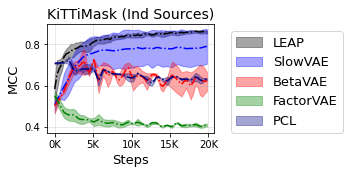

In [380]:
with PdfPages(figure_path + '/kitti_traj.pdf') as pdf:
    interval = 300
    steps = 200_00
    x_interp = np.arange(0, steps, interval)
    fig, axes = plt.subplots(1,1, figsize=(3,2))
    for i, path in enumerate(PATHS):
        files = glob.glob(path)
        results = [ ]
        for f in files:
            df = pd.read_csv(f)
            x = df['Step'].values
            y = df['Value'].values
            xnew = np.arange(0,x[-1], interval)
            f = interpolate.interp1d(x, y, fill_value='extrapolate')  
            ynew = f(xnew)
            if len(ynew) < len(x_interp):
                y_clip = list(ynew) + [ynew[-1]] * (len(x_interp)-len(ynew))
            else:
                y_clip = ynew[:len(x_interp)]
            results.append(y_clip)
        results = np.stack(results)
        results = np.clip(results, a_max=1, a_min=0)  
        axes.plot(x_interp,  np.mean(results, axis=0), color=colors[i], linestyle='-.')
        axes.fill_between(x_interp, 
                          np.mean(results, axis=0)-np.std(results, axis=0), 
                          np.mean(results, axis=0)+np.std(results, axis=0), 
                          color=colors[i], alpha=.35, label=labels[i])

    xlabels = ['{:,.0f}'.format(x) + 'K' for x in axes.get_xticks()/1000]
    axes.set_xticklabels(xlabels)
    axes.set_xlabel('Steps', fontsize=13)
    axes.set_ylabel('MCC', fontsize=13)
    axes.set_title('KiTTiMask (Ind Sources)', fontsize=14)
    axes.legend(loc=[1.1,0], fontsize=13)
    axes.grid(':', alpha=0.35)
#     axes.set_ylim([0.1,0.98])
    pdf.savefig(fig, bbox_inches="tight")

In [381]:
PATHS = ['/home/weiran/ltcl/baselines/ball_leap_v*',
         '/home/weiran/ltcl/baselines/ball_pcl_v*',
         '/home/weiran/ltcl/baselines/ball_bvae_v*',
         '/home/weiran/ltcl/baselines/ball_fvae_v*',
         '/home/weiran/ltcl/baselines/ball_svae_v*',
         ]
colors =  ['black', 'blue','red', 'green', 'navy']
labels = ['LEAP', 'SlowVAE','BetaVAE', 'FactorVAE', 'PCL']

/tmp/ipykernel_5213/1781388804.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(xlabels)


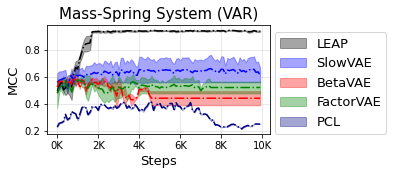

In [385]:
with PdfPages(figure_path + '/mbi_traj.pdf') as pdf:
    interval = 100
    steps = 100_00
    x_interp = np.arange(0, steps, interval)
    fig, axes = plt.subplots(1,1, figsize=(4,2))
    for i, path in enumerate(PATHS):
        files = glob.glob(path)
        results = [ ]
        for f in files:
            df = pd.read_csv(f)
            x = df['Step'].values
            y = df['Value'].values
            xnew = np.arange(0,x[-1], interval)
            f = interpolate.interp1d(x, y, fill_value='extrapolate')  
            ynew = f(xnew)
            if len(ynew) < len(x_interp):
                y_clip = list(ynew) + [ynew[-1]] * (len(x_interp)-len(ynew))
            else:
                y_clip = ynew[:len(x_interp)]
            results.append(y_clip)
        results = np.stack(results)
        results = np.clip(results, a_max=1, a_min=0)  
        axes.plot(x_interp,  np.mean(results, axis=0), color=colors[i], linestyle='-.')
        axes.fill_between(x_interp, 
                          np.mean(results, axis=0)-np.std(results, axis=0), 
                          np.mean(results, axis=0)+np.std(results, axis=0), 
                          color=colors[i], alpha=.35, label=labels[i])

    xlabels = ['{:,.0f}'.format(x) + 'K' for x in axes.get_xticks()/1000]
    axes.set_xticklabels(xlabels)
    axes.set_xlabel('Steps', fontsize=13)
    axes.set_ylabel('MCC', fontsize=13)
    axes.set_title('Mass-Spring System (VAR)', fontsize=15)
    axes.legend(loc=[1.02,0], fontsize=13)
    axes.grid(':', alpha=0.35)
#     axes.set_ylim([0.1,0.98])
    pdf.savefig(fig, bbox_inches="tight")

In [175]:
results

array([[0.23117772, 0.32420413, 0.33560306, 0.37224761, 0.33935179,
        0.35452637, 0.37819752, 0.39294057, 0.41365896, 0.3634527 ,
        0.3511166 , 0.38738504, 0.39546668, 0.37988113, 0.40540755,
        0.38182743, 0.38582659, 0.36641254, 0.32769801, 0.28441373,
        0.22855415, 0.24045695, 0.23176737, 0.23610973, 0.25238436],
       [0.23117772, 0.32420413, 0.33560306, 0.37224761, 0.33935179,
        0.35452637, 0.37819752, 0.39294057, 0.41365896, 0.3634527 ,
        0.3511166 , 0.38738504, 0.39546668, 0.37988113, 0.40540755,
        0.38182743, 0.38582659, 0.36641254, 0.32769801, 0.28441373,
        0.22855415, 0.24045695, 0.23176737, 0.23610973, 0.25238436]])

In [304]:
PATHS = ['/home/weiran/ltcl/towards/linear_changeable_causal/*.csv',
         '/home/weiran/ltcl/towards/linear_instan/*.csv',
         '/home/weiran/ltcl/towards/linear_gau/*.csv',
         '/home/weiran/ltcl/towards/linear_lowran/*.csv']
colors =  ['green', 'red', 'navy', 'blue']
labels = ['Changing relations', 'Instantaneous relations', 'Gaussian noise', 'Low-rank transitions']

/tmp/ipykernel_5213/660047747.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(xlabels)


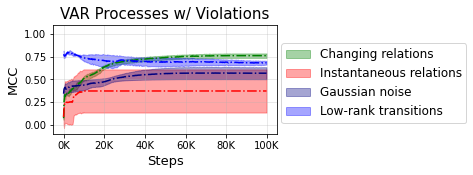

In [307]:
with PdfPages(figure_path + '/towards_var.pdf') as pdf:
    interval = 200
    steps = 100_000
    x_interp = np.arange(0, steps, interval)
    fig, axes = plt.subplots(1,1, figsize=(4,2))
    for i, path in enumerate(PATHS):
        files = glob.glob(path)
        results = [ ]
        for f in files:
            df = pd.read_csv(f)
            x = df['Step'].values
            y = df['Value'].values
            xnew = np.arange(0,x[-1], interval)
            f = interpolate.interp1d(x, y, fill_value='extrapolate')  
            ynew = f(xnew)
            if len(ynew) < len(x_interp):
                y_clip = list(ynew) + [ynew[-1]] * (len(x_interp)-len(ynew))
            else:
                y_clip = ynew[:len(x_interp)]
            results.append(y_clip)
        results = np.stack(results)
        results = np.clip(results, a_max=1, a_min=0)
        if i == 2:
            results = results - 0.15
        axes.plot(x_interp,  np.mean(results, axis=0), color=colors[i], linestyle='-.')
        axes.fill_between(x_interp, 
                          np.mean(results, axis=0)-np.std(results, axis=0), 
                          np.mean(results, axis=0)+np.std(results, axis=0), 
                          color=colors[i], alpha=.35, label=labels[i])

    xlabels = ['{:,.0f}'.format(x) + 'K' for x in axes.get_xticks()/1000]
    axes.set_xticklabels(xlabels)
    axes.set_xlabel('Steps', fontsize=13)
    axes.set_ylabel('MCC', fontsize=13)
    axes.set_title('VAR Processes w/ Violations',fontsize=15)
    axes.legend(loc=[1.02,0.1], fontsize=12)
    axes.grid(':', alpha=0.35)
    axes.set_ylim([-0.1,1.1])
    pdf.savefig(fig, bbox_inches="tight")


In [344]:
PATHS = ['/home/weiran/ltcl/baselines/toy_nonlinear_gau_ns_1_v*',
         '/home/weiran/ltcl/baselines/toy_nonlinear_gau_ns_5_v*',
         '/home/weiran/ltcl/baselines/toy_nonlinear_gau_ns_10_v*',
         '/home/weiran/ltcl/baselines/toy_nonlinear_gau_ns_15_v*',
         '/home/weiran/ltcl/baselines/toy_nonlinear_gau_ns_20_v*']
# colors =  ['gold','green', 'black', 'gray', 'red', 'orange', 'navy', 'blue']
colors =  ['red', 'green', 'blue','navy', 'black']

labels = ['Stationary noise', 'Nonstationary regimes=5','Nonstationary regimes=10', 'Nonstationary regimes=15', 'Nonstationary regimes=20']

In [345]:
glob.glob('/home/weiran/ltcl/baselines/toy_nonlinear_gau_ns_15_v*')

['/home/weiran/ltcl/baselines/toy_nonlinear_gau_ns_15_v0.csv',
 '/home/weiran/ltcl/baselines/toy_nonlinear_gau_ns_15_v2.csv']

/tmp/ipykernel_5213/179472635.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(xlabels)


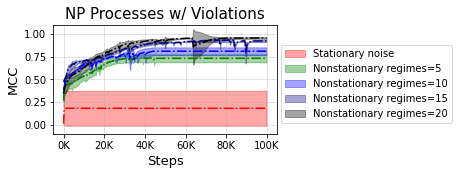

In [346]:
with PdfPages(figure_path + '/np_ns.pdf') as pdf:

    interval = 250
    steps = 100_000
    x_interp = np.arange(0, steps, interval)
    fig, axes = plt.subplots(1,1, figsize=(4,2))
    for i, path in enumerate(PATHS):
        files = glob.glob(path)
        results = [ ]
        for f in files:
            df = pd.read_csv(f)
            x = df['Step'].values
            y = df['Value'].values
            xnew = np.arange(0,x[-1], interval)
            f = interpolate.interp1d(x, y, fill_value='extrapolate')  
            ynew = f(xnew)
            if len(ynew) < len(x_interp):
                y_clip = list(ynew) + [ynew[-1]] * (len(x_interp)-len(ynew))
            else:
                y_clip = ynew[:len(x_interp)]
            results.append(y_clip)
        results = np.stack(results)
        results = np.clip(results, a_max=1, a_min=0)
        axes.plot(x_interp,  np.mean(results, axis=0), color=colors[i], linestyle='-.')
        axes.fill_between(x_interp, 
                          np.mean(results, axis=0)-np.std(results, axis=0), 
                          np.mean(results, axis=0)+np.std(results, axis=0), 
                          color=colors[i], alpha=.35, label=labels[i])

    xlabels = ['{:,.0f}'.format(x) + 'K' for x in axes.get_xticks()/1000]
    axes.set_xticklabels(xlabels)
    axes.set_xlabel('Steps',fontsize=13)
    axes.set_ylabel('MCC',fontsize=13)
    axes.set_title('NP Processes w/ Violations', fontsize=15)
    axes.legend(loc=[1.02,0.1], fontsize=10)
    axes.grid(':', alpha=0.45)
    axes.set_ylim([-0.1,1.1])
    pdf.savefig(fig, bbox_inches="tight")

In [334]:
PATHS = ['/home/weiran/ltcl/baselines/toy_nonlinear_ts_v[0-9][0-9].csv',
         '/home/weiran/ltcl/baselines/toy_nonlinear_ts_var_v*',
         '/home/weiran/ltcl/baselines/toy_nonlinear_ts_beta_v*',
         '/home/weiran/ltcl/baselines/toy_nonlinear_ts_fvae_v*',
         '/home/weiran/ltcl/baselines/toy_nonlinear_ts_ivae_v*',
         '/home/weiran/ltcl/baselines/toy_nonlinear_ts_tcl_v*',
         '/home/weiran/ltcl/baselines/toy_nonlinear_ts_pcl_v*',
         '/home/weiran/ltcl/baselines/toy_nonlinear_ts_svae_v*']
# colors =  ['gold','green', 'black', 'gray', 'red', 'orange', 'navy', 'blue']
colors =  ['black', 'gray', 'red', 'green', 'orange', 'brown', 'navy', 'blue']

labels = ['LEAP', 'LEAP-VAR','BetaVAE', 'FactorVAE', 'iVAE', 'TCL', 'PCL', 'SlowVAE']

/tmp/ipykernel_5213/4232460481.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(xlabels)


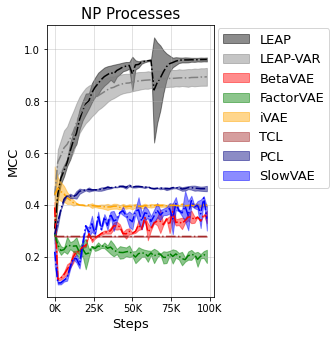

In [342]:
with PdfPages(figure_path + '/np_traj.pdf') as pdf:

    interval = 2000
    steps = 100_000
    x_interp = np.arange(0, steps, interval)
    fig, axes = plt.subplots(1,1, figsize=(3,5))
    for i, path in enumerate(PATHS):
        files = glob.glob(path)
        results = [ ]
        for f in files:
            df = pd.read_csv(f)
            x = df['Step'].values
            y = df['Value'].values
            xnew = np.arange(0,x[-1], interval)
            f = interpolate.interp1d(x, y, fill_value='extrapolate')  
            ynew = f(xnew)
            if len(ynew) < len(x_interp):
                y_clip = list(ynew) + [ynew[-1]] * (len(x_interp)-len(ynew))
            else:
                y_clip = ynew[:len(x_interp)]
            results.append(y_clip)
        results = np.stack(results)
        results = np.clip(results, a_max=1, a_min=0)
        axes.plot(x_interp,  np.mean(results, axis=0), color=colors[i], linestyle='-.')
        axes.fill_between(x_interp, 
                          np.mean(results, axis=0)-np.std(results, axis=0), 
                          np.mean(results, axis=0)+np.std(results, axis=0), 
                          color=colors[i], alpha=.45, label=labels[i])

    xlabels = ['{:,.0f}'.format(x) + 'K' for x in axes.get_xticks()/1000]
    axes.set_xticklabels(xlabels)
    axes.set_xlabel('Steps',fontsize=13)
    axes.set_ylabel('MCC',fontsize=13)
    axes.set_title('NP Processes', fontsize=15)
    axes.legend(loc=[1.02,0.4], fontsize=13)
    axes.grid(':', alpha=0.45)
#     axes.set_ylim([-0.1,1.1])
    pdf.savefig(fig, bbox_inches="tight")

In [14]:
files

['/home/weiran/ltcl/baselines/toy_nonlinear_ts_svae_v1.csv',
 '/home/weiran/ltcl/baselines/toy_nonlinear_ts_svae_v0.csv']